In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

## Load each country’s cleaned CSV (data/benin_clean.csv, etc.) locally.

In [22]:
# Load dataframes
benin_df = pd.read_csv("../data/benin-malanville_qc_clean.csv")
sierraleone_df = pd.read_csv("../data/sierraleone-bumbuna_qc_clean.csv")
togo_df = pd.read_csv("../data/togo_dapaong_clean.csv")

# Set country, to be used as xlabel
benin_df['country'] = 'Benin'
sierraleone_df['country'] = 'Sierra Leone'
togo_df['country'] = 'Togo'

df = pd.concat([benin_df, sierraleone_df, togo_df])
# Data Visualization 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1576800 entries, 0 to 525599
Data columns (total 20 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Timestamp      1576800 non-null  object 
 1   GHI            1576800 non-null  float64
 2   DNI            1576800 non-null  float64
 3   DHI            1576800 non-null  float64
 4   ModA           1576800 non-null  float64
 5   ModB           1576800 non-null  float64
 6   Tamb           1576800 non-null  float64
 7   RH             1576800 non-null  float64
 8   WS             1576800 non-null  float64
 9   WSgust         1576800 non-null  float64
 10  WSstdev        1576800 non-null  float64
 11  WD             1576800 non-null  float64
 12  WDstdev        1576800 non-null  float64
 13  BP             1576800 non-null  int64  
 14  Cleaning       1576800 non-null  int64  
 15  Precipitation  1576800 non-null  float64
 16  TModA          1576800 non-null  float64
 17  TModB         

## Metric Comparison

/tmp/ipykernel_6696/884417154.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='country', y='GHI', data=df, palette='Set2')
/tmp/ipykernel_6696/884417154.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='country', y='DNI', data=df, palette='Set2')
/tmp/ipykernel_6696/884417154.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='country', y='DHI', data=df, palette='Set2')


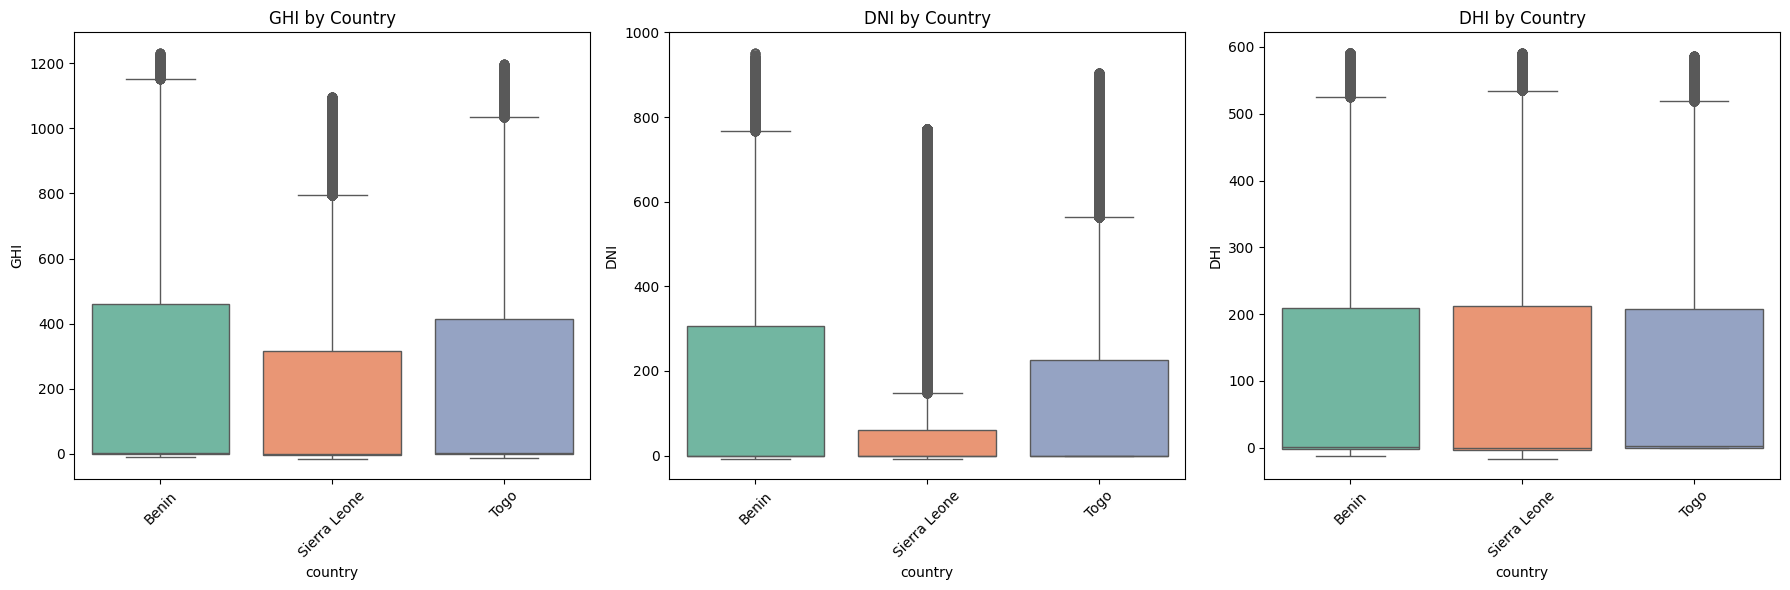

In [23]:
# Set the figure size
plt.figure(figsize=(18, 6))

# Create a boxplot for GHI
plt.subplot(1, 3, 1)  # 1 row, 3 columns, 1st subplot
sns.boxplot(x='country', y='GHI', data=df, palette='Set2')
plt.title("GHI by Country")
plt.xticks(rotation=45)

# Create a boxplot for DNI
plt.subplot(1, 3, 2)  # 1 row, 3 columns, 2nd subplot
sns.boxplot(x='country', y='DNI', data=df, palette='Set2')
plt.title("DNI by Country")
plt.xticks(rotation=45)

# Create a boxplot for DHI
plt.subplot(1, 3, 3)  # 1 row, 3 columns, 3rd subplot
sns.boxplot(x='country', y='DHI', data=df, palette='Set2')
plt.title("DHI by Country")
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


In [24]:
summary_stats = df.groupby('country').agg(
    GHI_mean=('GHI', 'mean'),
    GHI_median=('GHI', 'median'),
    GHI_std=('GHI', 'std'),
    DNI_mean=('DNI', 'mean'),
    DNI_median=('DNI', 'median'),
    DNI_std=('DNI', 'std'),
    DHI_mean=('DHI', 'mean'),
    DHI_median=('DHI', 'median'),
    DHI_std=('DHI', 'std')
).reset_index()
# Print the summary table
print(summary_stats)

        country    GHI_mean  GHI_median     GHI_std    DNI_mean  DNI_median  \
0         Benin  232.782219         1.8  327.083885  164.437476        -0.1   
1  Sierra Leone  179.274886         0.3  276.520057  100.898163        -0.1   
2          Togo  219.956519         2.1  315.850423  145.371431         0.0   

      DNI_std    DHI_mean  DHI_median     DHI_std  
0  260.921667  110.035783         1.6  152.545413  
1  198.638232  104.750275        -0.1  152.448886  
2  246.264222  110.840206         2.5  150.930197  


## Statistical Testing (optional but recommended)

In [25]:
f_statistic, p_value = f_oneway(benin_df["GHI"],sierraleone_df["GHI"],togo_df["GHI"])
f_statistic, p_value

(np.float64(4345.094298102169), np.float64(0.0))

## Key Observations

- **Benin** shows the highest average GHI, indicating it receives the most solar radiation on average compared to other countries.
- **Togo** has a significant median GHI, but also exhibits greater variability, suggesting fluctuations in solar radiation levels.
- **Sierraleone** ranks lower in average GHI but maintains a consistent level of solar radiation, as indicated by its lower standard deviation.

## (Bonus) Visual Summary

/tmp/ipykernel_6696/2722576197.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='GHI', y='country', data=ghi_means, palette='viridis')


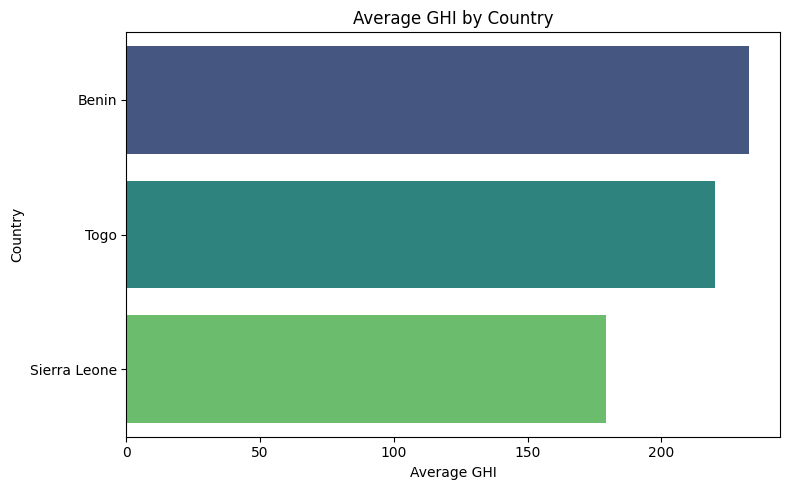

In [26]:
# Calculate mean GHI per country
ghi_means = df.groupby('country')['GHI'].mean().sort_values(ascending=False).reset_index()
# Set figure size
plt.figure(figsize=(8, 5))
# Create barplot
sns.barplot(x='GHI', y='country', data=ghi_means, palette='viridis')
# Set title and labels
plt.title('Average GHI by Country')
plt.xlabel('Average GHI')
plt.ylabel('Country')
# Show plot
plt.tight_layout()
plt.show()